# <span style="color:pink">Projekt część II</span>

<span style="color:pink">**_Zofia Różańska, 280526_**</span>

<span style="color:pink">_Dataset: Estimation of Obesity Levels Based On Eating Habits and Physical Condition_</span>


In [309]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [310]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score, ConfusionMatrixDisplay

In [329]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [312]:
# Load the dataset
dataset_path = 'C:/Users/Zofia/Desktop/ist/IV/msid/laby/msid/I/dataset.csv'
data = pd.read_csv(dataset_path)

# Display all columns and rows in the DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print(data.head())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

In [313]:
# Basic EDA
print(data.info())
print(data.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [314]:
# Indentify missing values
print('Missing values in each column:')
print(data.isnull().sum())
total_missing = data.isnull().sum().sum()
print(f'\nTotal missing values: {total_missing} {':(' if total_missing > 0 else ':)'}')

Missing values in each column:
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Total missing values: 0 :)


<span style="color:pink">No missing values for the Obesity Dataset :D</span>

## <span style="color:pink">Preprocessing</span>


In [315]:
# Separate features and target
X = data.drop('NObeyesdad', axis=1)
Y = data['NObeyesdad']

In [316]:
# Indentify categorical and numerical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns # Obesity dataset uses only float64
cat_cols = X.select_dtypes(include=['object', 'category']).columns # Obesity dataset uses only object

print(f'Numerical columns: {num_cols.values}')
print(f'Categorical columns: {cat_cols.values}')

Numerical columns: ['Age' 'Height' 'Weight' 'FCVC' 'NCP' 'CH2O' 'FAF' 'TUE']
Categorical columns: ['Gender' 'family_history_with_overweight' 'FAVC' 'CAEC' 'SMOKE' 'SCC'
 'CALC' 'MTRANS']


<span style="color:pink">Target column in the Obesity Dataset is a categorical column</span>

In [317]:
# Preprocessing pipeline for numerical data
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

<span style="color:pink">The Obesity Dataset has no missing values, but (just in case) it's better to implement a method to deal with them :)</span>

<span style="color:pink">StandardScaler transforms the data to have a mean of 0 and a standard deviation of 1</span>



In [318]:
# Preprocessing pipeline for categorical data
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

In [319]:
# Column preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols),
])

In [320]:
# Split data into trainig and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

## <span style="color:pink">Logistic Regression Model</span>

In [321]:
# Define the logistic regression model
model_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

In [322]:
# Train the model
model_reg.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object'))])),
                ('model', LogisticRegression(max_iter=1000))])

Accuracy: 90.530%
Classification report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.93      0.97      0.95        78
      Normal_Weight       0.85      0.83      0.84        69
     Obesity_Type_I       0.94      0.90      0.92        86
    Obesity_Type_II       0.96      1.00      0.98        73
   Obesity_Type_III       0.96      1.00      0.98        88
 Overweight_Level_I       0.84      0.76      0.80        68
Overweight_Level_II       0.82      0.83      0.83        66

           accuracy                           0.91       528
          macro avg       0.90      0.90      0.90       528
       weighted avg       0.90      0.91      0.90       528



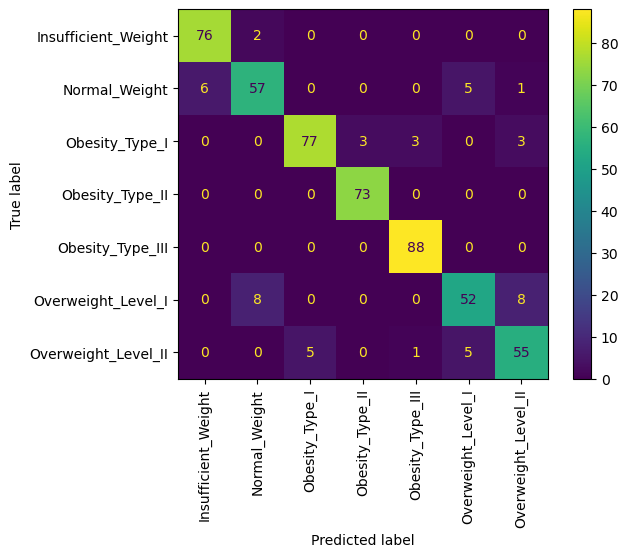

In [323]:
# Evaluate the model
Y_pred = model_reg.predict(X_test)

print(f'Accuracy: {accuracy_score(Y_test, Y_pred)*100:.3f}%')
print('Classification report:\n', classification_report(Y_test, Y_pred))

# Display confusion matrix
ConfusionMatrixDisplay.from_estimator(model_reg, X_test, Y_test)
plt.xticks(rotation=90)
plt.show()

## <span style="color:pink">Support Vector Classification Model (SVC)</span>

In [324]:
# Define the support vector classification model
model_svc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SVC())
])

In [325]:
# Train the model
model_svc.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object'))])),
                ('model', SVC())])

Accuracy: 92.235%
Classification report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.96      0.94      0.95        78
      Normal_Weight       0.79      0.84      0.82        69
     Obesity_Type_I       0.97      0.97      0.97        86
    Obesity_Type_II       0.99      1.00      0.99        73
   Obesity_Type_III       1.00      1.00      1.00        88
 Overweight_Level_I       0.81      0.84      0.83        68
Overweight_Level_II       0.90      0.83      0.87        66

           accuracy                           0.92       528
          macro avg       0.92      0.92      0.92       528
       weighted avg       0.92      0.92      0.92       528



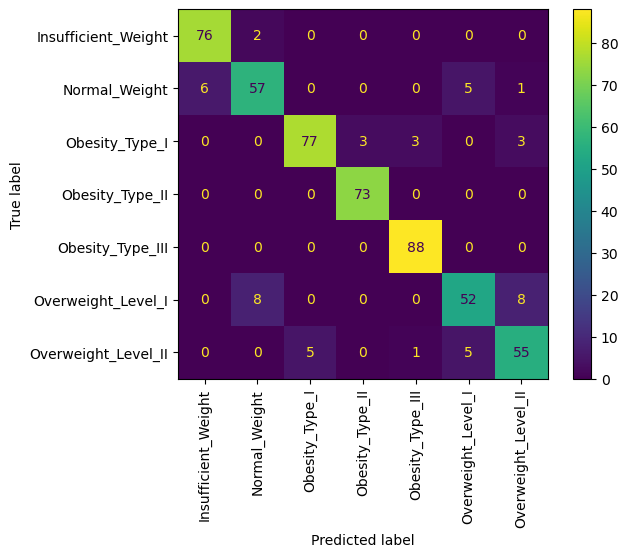

In [327]:
# Evaluate the model
Y_pred = model_svc.predict(X_test)

print(f'Accuracy: {accuracy_score(Y_test, Y_pred)*100:.3f}%')
print('Classification report:\n', classification_report(Y_test, Y_pred))

# Display confusion matrix
ConfusionMatrixDisplay.from_estimator(model_reg, X_test, Y_test)
plt.xticks(rotation=90)
plt.show()

## <span style="color:pink">Decision Tree Classifier Model</span>

In [330]:
# Define the decision tree classifier model
model_tree = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier())
])

In [331]:
# Train the model
model_tree.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object'))])),
                ('model', DecisionTreeClassifier())])

Accuracy: 92.235%
Classification report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.97      0.92      0.95        78
      Normal_Weight       0.80      0.87      0.83        69
     Obesity_Type_I       0.93      0.97      0.95        86
    Obesity_Type_II       1.00      0.97      0.99        73
   Obesity_Type_III       0.98      1.00      0.99        88
 Overweight_Level_I       0.88      0.78      0.83        68
Overweight_Level_II       0.87      0.91      0.89        66

           accuracy                           0.92       528
          macro avg       0.92      0.92      0.92       528
       weighted avg       0.92      0.92      0.92       528



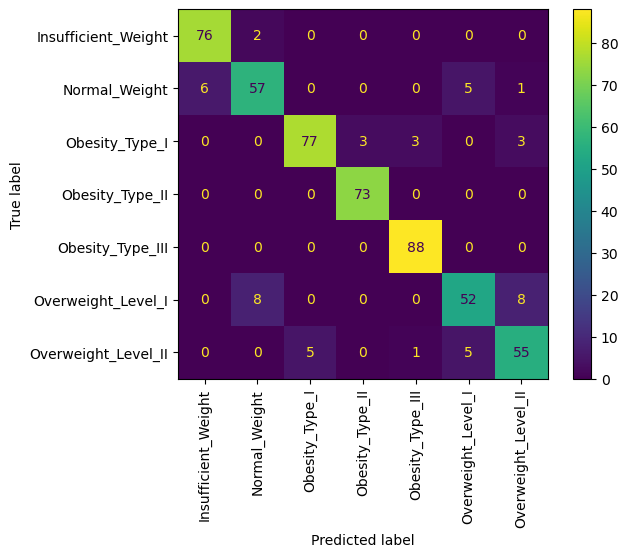

In [332]:
# Evaluate the model
Y_pred = model_tree.predict(X_test)

print(f'Accuracy: {accuracy_score(Y_test, Y_pred)*100:.3f}%')
print('Classification report:\n', classification_report(Y_test, Y_pred))

# Display confusion matrix
ConfusionMatrixDisplay.from_estimator(model_reg, X_test, Y_test)
plt.xticks(rotation=90)
plt.show()